# 6] Exercise: Implement SGD for linear regression

In [1]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

## Creating train and test set

In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos['PRICE'] = boston.target


X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

## Linear Regression and SGDRegressor

In [38]:
# lm = LinearRegression()
# lm.fit(X_train, Y_train)
# pred_lm = lm.predict(X_test)

sgd = SGDRegressor(max_iter=1000,eta0=0.000001)
sgd.fit(X_train, Y_train)
pred_sgd=sgd.predict(X_test)

## Comparision Between SGD and Linear regression

In [39]:
# http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.metrics import median_absolute_error,r2_score

lm_evs = explained_variance_score(Y_test, pred_lm)
lm_mae = mean_absolute_error(Y_test, pred_lm)
lm_med = median_absolute_error(Y_test, pred_lm)
lm_r2 = r2_score(Y_test, pred_lm)

sgd_evs = explained_variance_score(Y_test, pred_sgd)
sgd_mae = mean_absolute_error(Y_test, pred_sgd)
sgd_med = median_absolute_error(Y_test, pred_sgd)
sgd_r2 = r2_score(Y_test, pred_sgd)


In [44]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Explained variance score", "Mean absolute error", "Median Ab. er.", "R2_Score"]

x.add_row(["Linear Regression",lm_evs,lm_mae,lm_med,lm_r2])
x.add_row(["Sgd",sgd_evs,sgd_mae,sgd_med,sgd_r2])
print('\tTable 2 - Comparing Value of alpha, Train error and test error')
print('\t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print(x)

	Table 2 - Comparing Value of alpha, Train error and test error
	~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+-------------------+--------------------------+---------------------+--------------------+--------------------+
|       Model       | Explained variance score | Mean absolute error |   Median Ab. er.   |      R2_Score      |
+-------------------+--------------------------+---------------------+--------------------+--------------------+
| Linear Regression |    0.7093896780797531    |  3.389422255326814  | 2.6269427656036752 | 0.7091229771976693 |
|        Sgd        |    0.3008244684455631    |  5.594713590024939  | 4.548057880233083  | 0.2993435559706774 |
+-------------------+--------------------------+---------------------+--------------------+--------------------+


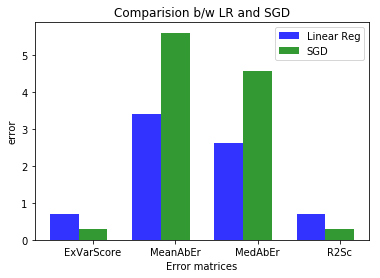

In [41]:
#https://pythonspot.com/matplotlib-bar-chart/

import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
lm = (lm_evs,lm_mae,lm_med,lm_r2)
sgd = (sgd_evs,sgd_mae,sgd_med,sgd_r2)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, lm, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Linear Reg')
 
rects2 = plt.bar(index + bar_width, sgd, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SGD')
 
plt.xlabel('Error matrices')
plt.ylabel('error')
plt.title('Comparision b/w LR and SGD')
plt.xticks(index + bar_width, ('ExVarScore', 'MeanAbEr', 'MedAbEr', 'R2Sc'))
plt.legend()
 
# plt.tight_layout()
plt.show()


### Conclusion
### __ Linear Regression is better than SGD regression __
    
    